In [1]:
import os
print(os.getcwd())
os.chdir("..")



/mnt/home/icb/florin.ratajczak/ppi-core-genes/coregenes


In [2]:
from coregenes.utils.datahandlers import ResultsHandler
from coregenes.utils.metrics import MetricsHelper

import numpy as np

In [12]:
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging3.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging_mse_2.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging_mse.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging_mse_fc.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging_lambda.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging_approxndcg.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/big_bagging_neuralndcg2.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/linkx_mse_3.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/linkx_mse_l1_1.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/linkx_mse_l1_01.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/linkx_mse_l1_001.h5", read_only=True)
#handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/linkx_mse_l1_001.h5", read_only=True)
handler = ResultsHandler("/storage/groups/epigenereg01/projects/ppi-florin/results/linkx_mse_l1_1e-5.h5", read_only=True)

results = handler.results_dset[:,:,:]

In [16]:
handler.close()

In [14]:
results.shape

(200, 16433, 6)

In [13]:

def eval_holdout_set(results_, p=1):
    if p < 1:
        indices = results_.shape[0]
        import random
        choices = random.choices(range(indices), k=int(indices * p))
        results_ = results_[choices, :, :]
    truth = results_[0,:,0]
    indices = np.where(results_[:,:,4:6])[1]
    predictions_val = results_[:,:,2][((results_[:,:,4] == 1) + (results_[:,:,5] == 1))]
    both = np.stack((indices, predictions_val),axis=1)
    both_sorted = both[both.T[0,:].argsort()]
    split_by_index =  [np.median(array) for array in np.split(both_sorted[:, 1], np.unique(both_sorted[:, 0], return_index=True)[1][1:])]
    metrics = MetricsHelper(truth,masks={},pred_cutoff=0.7)
    metrics.update(np.asarray(split_by_index), "all")
    return metrics.get_metrics("auroc", "auprc", "f1", "mrr_filtered", "mean_rank_filtered", "hits_at_100_filtered")

auroc, auprc, f1, mrr, mean_rank, hitsat100 = eval_holdout_set(results,1)
print("AUROC: {}, AUPRC: {}, F1: {}, MRR: {}, Mean Rank: {}, Hits@100: {}, Target: {}".format(auroc, auprc, f1, mrr, mean_rank, hitsat100, "val"))

AUROC: 0.6004928337943174, AUPRC: 0.06740483577617054, F1: 0.022346368715083796, MRR: 0.007851525085315753, Mean Rank: 6356.36, Hits@100: 0.03619047619047619, Target: val


In [14]:
def eval_training_set(results_, p=1):
    if p < 1:
        indices = results_.shape[0]
        import random
        choices = random.choices(range(indices), k=int(indices * p))
        results_ = results_[choices, :, :]
    truth_train = results_[0,:,0][results_[0,:,5] == 0]
    indices = np.where(results_[:,:,3])[1]
    predictions_val = results_[:,:,2][results_[:,:,3] == 1]
    both = np.stack((indices, predictions_val),axis=1)
    both_sorted = both[both.T[0,:].argsort()]
    split_by_index_train =  [np.median(array) for array in np.split(both_sorted[:, 1], np.unique(both_sorted[:, 0], return_index=True)[1][1:])]
    metrics = MetricsHelper(truth_train,masks={},pred_cutoff=0.7)
    metrics.update(np.asarray(split_by_index_train), "all")
    return metrics.get_metrics("auroc", "auprc", "f1", "mrr_filtered", "mean_rank_filtered", "hits_at_100_filtered")

auroc, auprc, f1, mrr, mean_rank, hitsat100 = eval_training_set(results)
print("AUROC: {}, AUPRC: {}, F1: {}, MRR: {}, Mean Rank: {}, Hits@100: {}, Target: {}".format(auroc, auprc, f1, mrr, mean_rank, hitsat100, "train"))

AUROC: 0.9788753372518726, AUPRC: 0.8388858740089129, F1: 0.7235668789808917, MRR: 0.5738811174201206, Mean Rank: 320.2570281124498, Hits@100: 0.748995983935743, Target: train


In [7]:
truth_train = results[0,:,0][results[0,:,5] == 0]
indices = np.where(results[:,:,3])[1]
predictions_val = results[:,:,2][results[:,:,3] == 1]
both = np.stack((indices, predictions_val),axis=1)
both_sorted = both[both.T[0,:].argsort()]
split_by_index_train =  [np.median(array) for array in np.split(both_sorted[:, 1], np.unique(both_sorted[:, 0], return_index=True)[1][1:])]

truth = results[0,:,0]
indices = np.where(results[:,:,4:6])[1]
predictions_val = results[:,:,2][((results[:,:,4] == 1) + (results[:,:,5] == 1))]
both = np.stack((indices, predictions_val),axis=1)
both_sorted = both[both.T[0,:].argsort()]
split_by_index =  [np.median(array) for array in np.split(both_sorted[:, 1], np.unique(both_sorted[:, 0], return_index=True)[1][1:])]

true_pos_train = np.asarray(split_by_index_train)[truth_train.astype(np.bool8)] 
true_neg_train = np.asarray(split_by_index_train)[~truth_train.astype(np.bool8)] 
true_pos_val = np.asarray(split_by_index)[truth.astype(np.bool8)]
true_neg_val = np.asarray(split_by_index)[~truth.astype(np.bool8)]

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

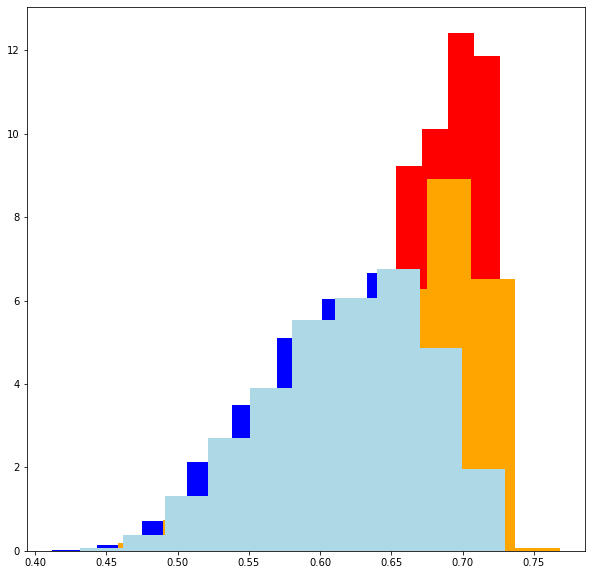

In [76]:
plt.hist(true_pos_train,color="red",density=True)
plt.hist(true_neg_train,color="blue",density=True)
plt.hist(true_pos_val,color="orange",density=True)
plt.hist(true_neg_val,color="lightblue",density=True)
plt.show()

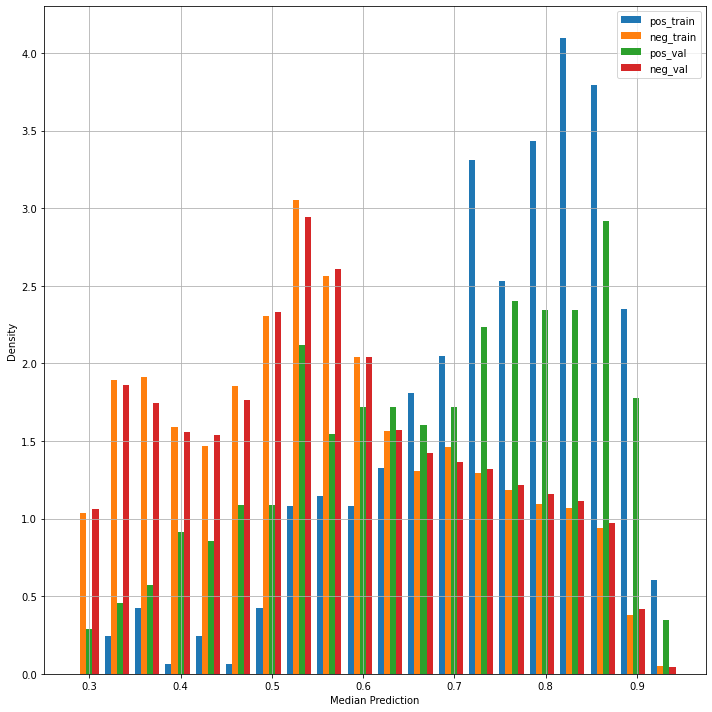

In [105]:
plt.hist([true_pos_train,true_neg_train,true_pos_val,true_neg_val],label=["pos_train","neg_train","pos_val","neg_val"],density=True,bins=20)
plt.xlabel("Median Prediction")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("predicted_scores_bce_gcn.jpg")

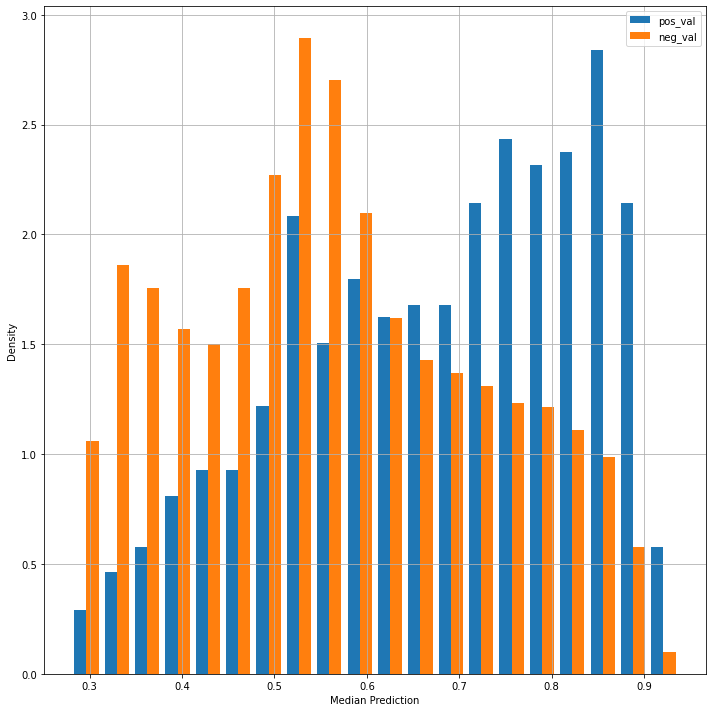

In [106]:
plt.hist([true_pos_val,true_neg_val],label=["pos_val","neg_val"],density=True,bins=20)
plt.xlabel("Median Prediction")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("predicted_scores_bce_gcn_val.jpg")

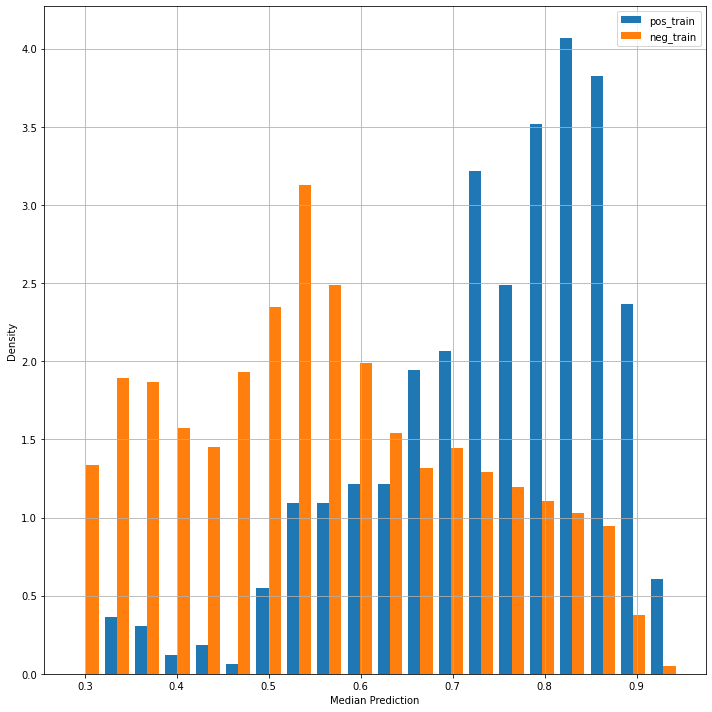

In [107]:
plt.hist([true_pos_train,true_neg_train],label=["pos_train","neg_train"],density=True,bins=20)
plt.xlabel("Median Prediction")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("predicted_scores_bce_gcn_train.jpg")

In [53]:
candidate_genes = handler.file["index"][:].astype(str).squeeze()[np.where(true_neg_train>0.7)]

In [58]:
np.savetxt("candidate_genes_bagging_mse_immune_dysregulation.txt", candidate_genes,fmt="%s")

In [18]:
def probe_bagging_results(results, num_takes = 10, target="val"):

    aurocs_means = list()
    auprcs_means = list() 
    f1s_means = list() 
    mrrs_means = list() 
    mean_ranks_means = list()
    hitsat100s_means = list()
    num_models_list = list()

    aurocs_serrs = list()
    auprcs_serrs = list() 
    f1s_serrs = list() 
    mrrs_serrs = list() 
    mean_ranks_serrs = list()
    hitsat100s_serrs = list()

    for percentage in [p / 10 for p in list(range(1,11))]:
        num_models = int(results.shape[0] * percentage)
        aurocs = list()
        auprcs = list() 
        f1s = list() 
        mrrs = list() 
        mean_ranks = list()
        hitsat100s = list()

        for i in range(num_takes):
            try:
                if target == "val":
                    auroc, auprc, f1, mrr, mean_rank, hitsat100 = eval_holdout_set(results, percentage)
                elif target == "train":
                    auroc, auprc, f1, mrr, mean_rank, hitsat100 = eval_training_set(results, percentage)
            except ValueError:
                auroc, auprc, f1, mrr, mean_rank, hitsat100 = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
            aurocs.append(auroc)
            auprcs.append(auprc)
            f1s.append(f1)
            mrrs.append(mrr)
            mean_ranks.append(mean_rank)
            hitsat100s.append(hitsat100)

            if percentage == 1:
                # if 100% of models are used, we don't need to sample 5 times since samples are identical
                break

        aurocs_means.append(np.mean(aurocs))
        auprcs_means.append(np.mean(auprcs))
        f1s_means.append(np.mean(f1s))
        mrrs_means.append(np.mean(mrrs))
        mean_ranks_means.append(np.mean(mean_ranks))
        hitsat100s_means.append(np.mean(hitsat100s))
        num_models_list.append(np.mean(num_models))

        aurocs_serrs.append(np.std(aurocs, ddof=1) / np.sqrt(np.size(aurocs)))
        auprcs_serrs.append(np.std(auprcs, ddof=1) / np.sqrt(np.size(auprcs)))
        f1s_serrs.append(np.std(f1s, ddof=1) / np.sqrt(np.size(f1s)))
        mrrs_serrs.append(np.std(mrrs, ddof=1) / np.sqrt(np.size(mrrs)))
        mean_ranks_serrs.append(np.std(mean_ranks, ddof=1) / np.sqrt(np.size(mean_ranks)))
        hitsat100s_serrs.append(np.std(hitsat100s, ddof=1) / np.sqrt(np.size(hitsat100s)))

    resultsdict = {"AUROC": [aurocs_means, aurocs_serrs],
                   "AUPRC": [auprcs_means, auprcs_serrs],
                   "F1 Score": [f1s_means, f1s_serrs],
                   "MRR": [mrrs_means, mrrs_serrs],
                   "Mean Rank": [mean_ranks_means, mean_ranks_serrs],
                   "Hits@100": [hitsat100s_means, hitsat100s_serrs]}

    return resultsdict, num_models_list

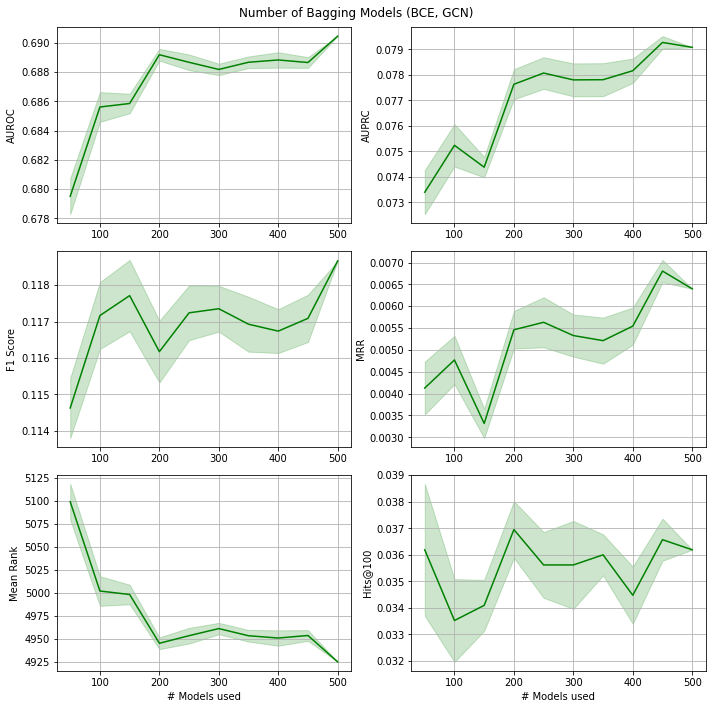

In [111]:
fig, axs = plt.subplots(3,2)

resultsdict, num_models_list = probe_bagging_results(results)

for i, (ax, (label, (values, stderrs))) in enumerate(zip(axs.reshape(-1), resultsdict.items())):
    stderrs = np.asarray(stderrs)
    stderrs[np.isnan(stderrs)] = 0
    mins = [value - stderr for value, stderr in zip(values,stderrs)]
    #mins.append(values[-1])
    maxs = [value + stderr for value, stderr in zip(values,stderrs)]
    #maxs.append(values[-1])
    ax.plot(num_models_list, values,color='green')
    ax.fill_between(num_models_list,mins,maxs,color='green', alpha=0.2)
    ax.set_ylabel(label)
    ax.grid(True)
    if i > 3:
        ax.set_xlabel('# Models used')

plt.suptitle("Number of Bagging Models (BCE, GCN)")

plt.tight_layout()
plt.savefig("bagging_bce_gcn.jpg")

/home/icb/florin.ratajczak/anaconda3/envs/compat/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/icb/florin.ratajczak/anaconda3/envs/compat/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/icb/florin.ratajczak/anaconda3/envs/compat/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/icb/florin.ratajczak/anaconda3/envs/compat/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/icb/florin.ratajczak/anaconda3/envs/compat/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/icb/florin.ratajczak/an

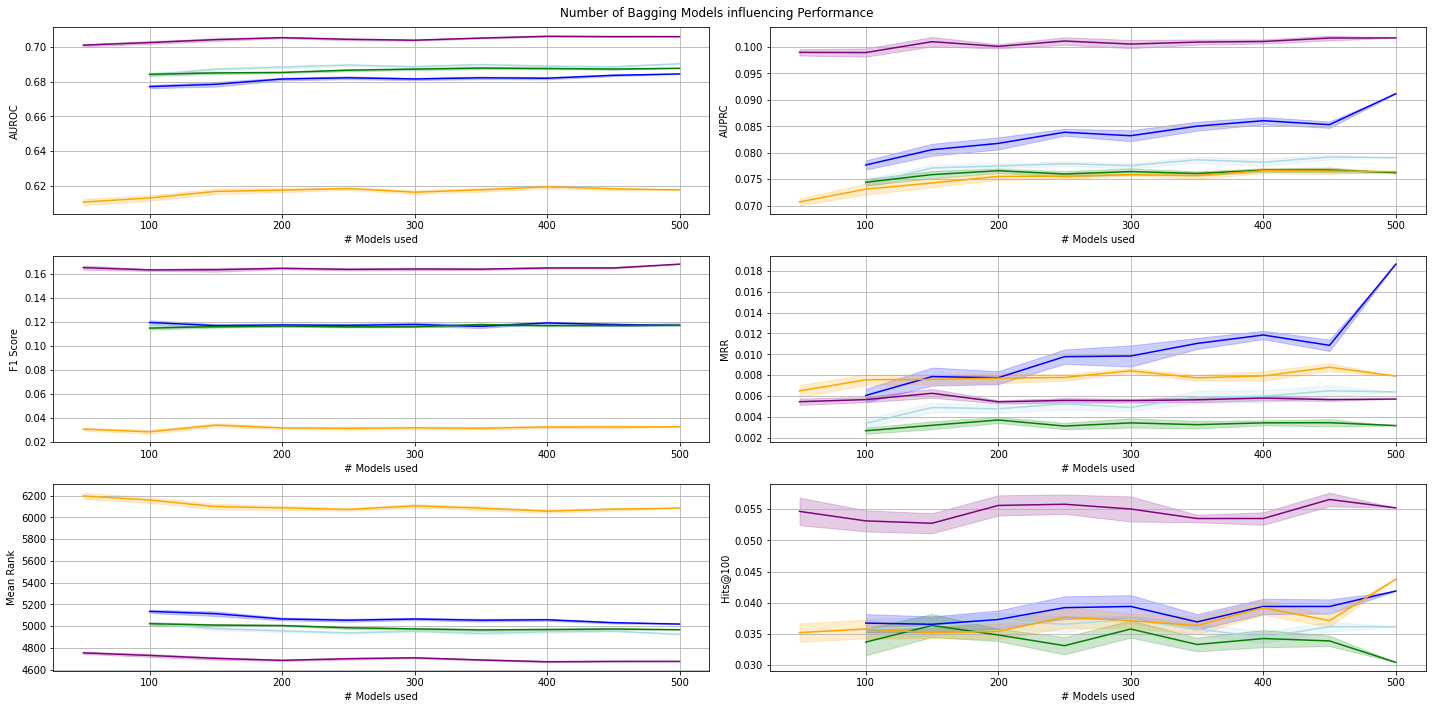

In [19]:
import os
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

base_path = "/storage/groups/epigenereg01/projects/ppi-florin/results/"

run_names = {"(GCN, BCE)": os.path.join(base_path, "big_bagging3.h5"),
             "(GCN, MSE)": os.path.join(base_path, "big_bagging_mse_2.h5"),
             "(GCN, LambdaRank)": os.path.join(base_path, "big_bagging_lambda.h5"),
             "(FC, MSE)": os.path.join(base_path, "big_bagging_mse_fc.h5"),
             "(LINKX, MSE)": os.path.join(base_path, "linkx_mse_3.h5")}

fig, axs = plt.subplots(3,2)

colors = {"(GCN, BCE)": "lightblue",
          "(GCN, MSE)": "blue",
          "(GCN, LambdaRank)": "green",
          "(FC, MSE)": "purple",
          "(LINKX, MSE)": "orange"}

for name, path in run_names.items():
    handler = ResultsHandler(path, read_only=True)
    results = handler.results_dset[:,:,:]

    resultsdict, num_models_list = probe_bagging_results(results, target="val")

    for i, (ax, (label, (values, stderrs))) in enumerate(zip(axs.reshape(-1), resultsdict.items())):
        stderrs = np.asarray(stderrs)
        stderrs[np.isnan(stderrs)] = 0
        mins = [value - stderr for value, stderr in zip(values,stderrs)]
        maxs = [value + stderr for value, stderr in zip(values,stderrs)]
        ax.plot(num_models_list, values,color=colors[name])
        ax.fill_between(num_models_list,mins,maxs,color=colors[name], alpha=0.2)
        ax.set_ylabel(label)
        ax.grid(True)
        ax.set_xlabel('# Models used')

    plt.suptitle("Number of Bagging Models influencing Performance")

    plt.tight_layout()
    plt.savefig("bagging_all.jpg")

In [60]:
candidate_genes_val = handler.file["index"][:].astype(str).squeeze()[np.where(true_neg_val>0.7)]

In [63]:
set(candidate_genes_val).intersection(set(candidate_genes)) 

{'A2M',
 'ANKRD63',
 'CCDC186',
 'DISP3',
 'FADD',
 'GLRX5',
 'IMPA1',
 'LEFTY2',
 'LMBR1L',
 'LTA4H',
 'MAJIN',
 'NUDT16L1',
 'OST4',
 'PRR4',
 'VRK2',
 'YAF2',
 'ZNF223'}

In [242]:
def recall_at_k(r, k):
    """Score is recall @ k
    Relevance is binary (nonzero is relevant).
    Traceback (most recent call last):
        File "<stdin>", line 1, in ?
    ValueError: Relevance score length < k
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
    Returns:
        recall @ k
    Raises:
        ValueError: len(r) must be >= k
    """
    assert k >= 1
    top_r = np.asarray(r)[:k] != 0
    if top_r.size != k:
        raise ValueError('Relevance score length < k')
    return np.sum(top_r)/np.sum(r)

recall_at_k(ordered_truth_val,500)

0.11222444889779559

In [247]:
r = [0, 0, 1]
print(recall_at_k(r,1), precision_at_k(r,1))
print(recall_at_k(r,3), precision_at_k(r,3))

0.0 0.0
1.0 0.3333333333333333


In [218]:
ordered_truth_val

array([1., 0., 0., ..., 0., 0., 0.])

In [192]:
np.mean([1. / (r + 1) for sublist in rs for r in sublist]) 

0.9999679713022869

In [196]:
np.mean(np.where(random_rs))

3922.8446893787577

In [269]:
precision_at_k(ordered_truth_val,500)

0.122

In [270]:
ndcg_at_k(ordered_truth_val,5)

0.4211582832992166

In [222]:
def get_metrics(rs, additional_truth=None, get_hits=[]):
        """Score is reciprocal of the rank of the first relevant item
        First element is 'rank 1'.  Relevance is binary (nonzero is relevant).
        Example from http://en.wikipedia.org/wiki/Mean_reciprocal_rank
        >>> rs = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
        >>> mean_reciprocal_rank(rs)
        0.61111111111111105
        >>> rs = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]])
        >>> mean_reciprocal_rank(rs)
        0.5
        >>> rs = [[0, 0, 0, 1], [1, 0, 0], [1, 0, 0]]
        >>> mean_reciprocal_rank(rs)
        0.75
        Args:
            rs: Iterator of relevance scores (list or numpy) in rank order
                (first element is the first item)
        Returns:
            Mean reciprocal rank
        """
        rs_raw = list(np.asarray(r).nonzero()[0] for r in rs if np.sum(r) > 0)
        
        mrr_raw = np.mean([1. / (r + 1) for sublist in rs_raw for r in sublist]) 
        mean_rank_raw = np.mean([r + 1 for sublist in rs_raw for r in sublist]) 

        hitsat5_raw = np.mean([1 if r < 5 else 0 for sublist in rs_raw for r in sublist]) 
        hitsat10_raw = np.mean([1 if r < 10 else 0 for sublist in rs_raw for r in sublist]) 
        hitsat20_raw = np.mean([1 if r < 20 else 0 for sublist in rs_raw for r in sublist]) 
        hitsat50_raw = np.mean([1 if r < 50 else 0 for sublist in rs_raw for r in sublist]) 

        total_before = np.sum(rs)

        rs_filtered = []
        if additional_truth is not None:
        #if True:
            # also remove all known true examples from the other sets
            rs_prefiltered = []
            for i, additional in enumerate(additional_truth):
                to_delete = additional.nonzero()[0]
                rs_prefiltered.append(np.delete(rs[i],to_delete)) 
            
            total_after = np.sum(np.sum(r) for r in rs_prefiltered)
            assert  total_before == total_after # nothing lost filtering for out-of-sample edges
            rs = rs_prefiltered

        for r in rs:
            while np.sum(r) > 0:
                best = r.nonzero()[0][0]
                best_r = np.zeros_like(r)
                best_r[best] = 1
                rs_filtered.append(best_r)
                r = np.delete(r, best)

        total_after = np.sum(np.sum(r) for r in rs_filtered)
        assert total_before == total_after # nothing lost in filtering
        assert len(rs_filtered) == total_before # every edge gets its own array
        for r in rs_filtered:
            assert np.sum(r) == 1 # only one edge in every array

        
        rs_filtered = list(np.asarray(r).nonzero()[0] for r in rs_filtered if np.sum(r) > 0)
        mrr_filtered = np.mean([1. / (r + 1) if r.size else 0. for r in rs_filtered]) 
        mean_rank_filtered = np.mean([r + 1 if r.size else 0. for r in rs_filtered]) 

        hitsat5_filtered = np.mean([1 if r < 5 else 0 for sublist in rs_filtered for r in sublist])
        hitsat10_filtered = np.mean([1 if r < 10 else 0 for sublist in rs_filtered for r in sublist])
        hitsat20_filtered = np.mean([1 if r < 20 else 0 for sublist in rs_filtered for r in sublist]) 
        hitsat500_filtered = np.mean([1 if r < 500 else 0 for sublist in rs_filtered for r in sublist])

        return (mrr_raw, mrr_filtered, mean_rank_raw, mean_rank_filtered, hitsat5_raw, hitsat5_filtered, hitsat10_raw, hitsat10_filtered,
            hitsat20_raw, hitsat20_filtered, hitsat50_raw, hitsat500_filtered)

In [272]:
get_metrics([ordered_truth_val])

/tmp/ipykernel_30611/1716292592.py:53: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  total_after = np.sum(np.sum(r) for r in rs_filtered)


(0.0043237625402892145,
 0.0043237625402892145,
 4904.75751503006,
 4904.75751503006,
 0.004008016032064128,
 0.004008016032064128,
 0.006012024048096192,
 0.006012024048096192,
 0.012024048096192385,
 0.012024048096192385,
 0.02404809619238477,
 0.12224448897795591)